## K-Means Clustering menggunkan Python (Case : Online Retail Dataset)

Dataset OnlineRetail merupakan sekumpulan data transaksional dari toko-toko online/retail di UK yang terdaftar di suatu perusahaan retail online, dengan rentang waktu periode 1 Desember 2010 sampai dengan tanggal 9 Desember 2011


## Importing the Library

In [1]:
import os
import math
import datetime as dt
import numpy as np
import pandas
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import model_selection
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn.preprocessing import scale, StandardScaler, normalize, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


## Load Dataset

In [2]:
data=os.path.join(os.getcwd(), 'online_retail_II.xlsx')
dataset=pd.read_excel(data,delimiter=',',encoding='latin-1', index_col=False)


In [3]:
dataset

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


Keterangan Atribut:

Invoice
Yang merupakan nomor faktur. Jumlah digit angka integral sejumlah 6 digit yang ditetapkan secara unik untuk setiap transaksi.

StockCode
Merupakan kode produk (item). Jumlah digit angka integral sejumlah 5 digit yang ditetapkan secara unik untuk setiap produk yang berbeda.

Description
Merupakan Nama produk (item).

Quantity
Merupakan kuantitas setiap produk (item) per transaksi yang bersifat numerik.

InvoiceDate
Merupakan Tanggal dan waktu layanan. Bersifat Numerik, hari dan waktu ketika setiap transaksi dihasilkan.

Price:
Merupakan harga satuan yang bersifat umerik, Harga produk per unit dalam sterling.

CustomerID
Merupakan nomor pelanggan yang bersifat Nominal. Jumlah digit angka integral sejumlah 5 digit yang ditetapkan secara unik untuk setiap pelanggan.
Country
Merupakan nama negara. Nominal, nama negara tempat setiap pelanggan tunggal.

## Eksplorasi Data

In [4]:
dataset.shape

(541910, 8)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
Invoice        541910 non-null object
StockCode      541910 non-null object
Description    540456 non-null object
Quantity       541910 non-null int64
InvoiceDate    541910 non-null datetime64[ns]
Price          541910 non-null float64
CustomerID     406830 non-null float64
Country        541910 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## Missing Data

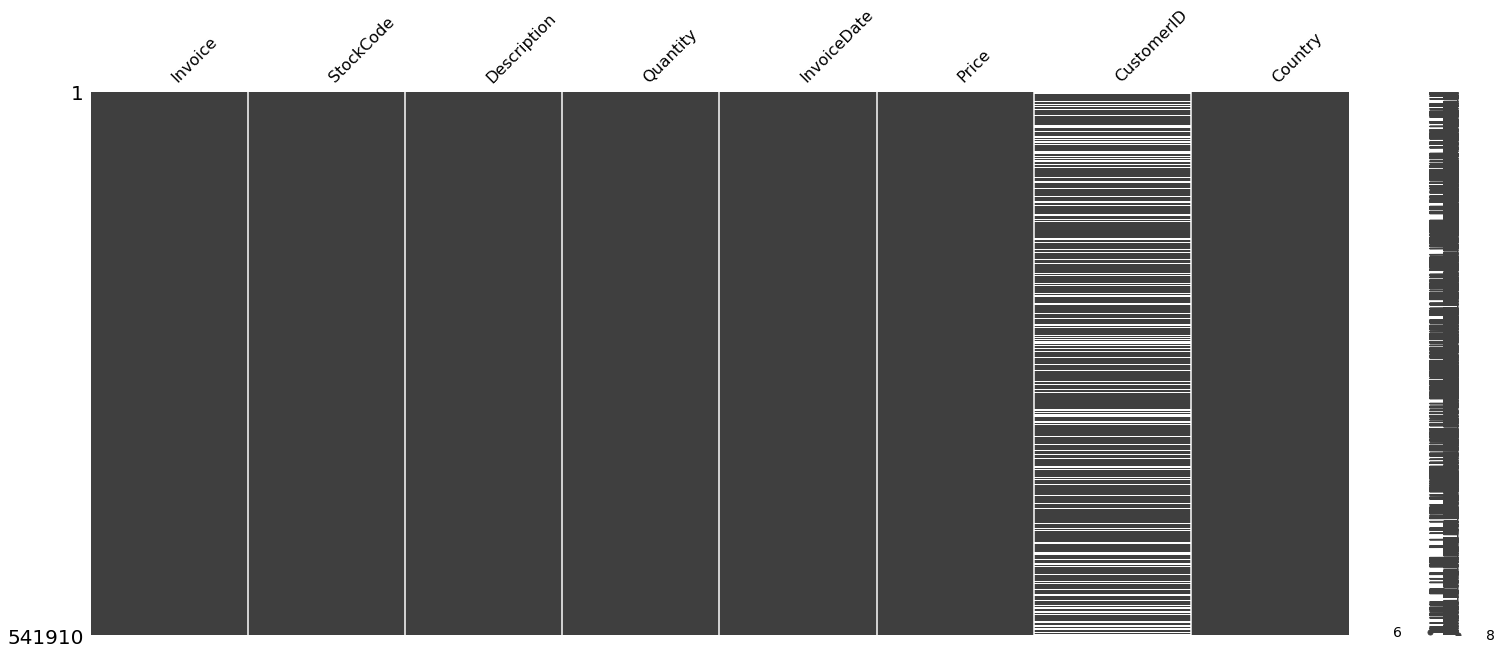

In [6]:
msno.matrix(dataset)

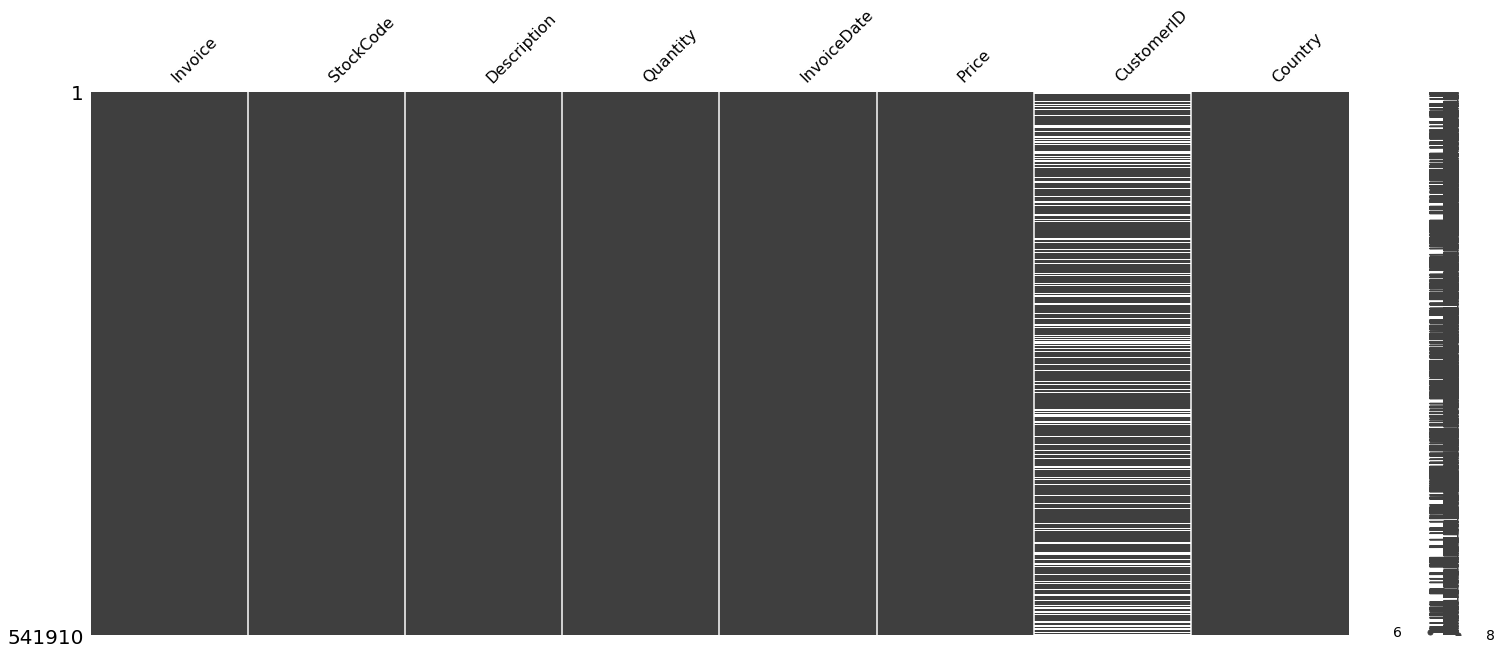

In [7]:
msno.matrix(dataset)

In [8]:
dataset.describe(include='all')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country
count,541910.0,541910,540456,541910.000000,541910,541910.000000,406830.000000,541910
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552234,NaN,4.611138,15287.684160,NaN
std,NaN,NaN,NaN,218.080957,NaN,96.759765,1713.603074,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


In [9]:
print("Number of transactions: ", dataset['Invoice'].nunique())
print("Number of products bought: ", dataset['StockCode'].nunique())
print("Number of customers:", dataset['CustomerID'].nunique())
print('Number of countries: ', dataset['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Number of countries:  38


In [10]:
np.sum(dataset.isnull())

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
CustomerID     135080
Country             0
dtype: int64

In [11]:
print("Percentage of customers missing: ", round(dataset['CustomerID'].isnull().sum() * 100 / len(dataset),2),"%" )

Percentage of customers missing:  24.93 %


In [12]:

dataset['CustomerID_is_null'] = [1 if i == True else 0 for i in dataset.CustomerID.isnull()]

In [13]:
#Create a new dateframe of only orders with missing CustomerID values
dataset1 = dataset[dataset['CustomerID_is_null'] == 1]

In [14]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135080 entries, 622 to 541540
Data columns (total 9 columns):
Invoice               135080 non-null object
StockCode             135080 non-null object
Description           133626 non-null object
Quantity              135080 non-null int64
InvoiceDate           135080 non-null datetime64[ns]
Price                 135080 non-null float64
CustomerID            0 non-null float64
Country               135080 non-null object
CustomerID_is_null    135080 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 10.3+ MB


In [15]:
dataset1.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom,1
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom,1
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom,1
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom,1
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom,1


In [16]:
print("Number of orders in dataset1:", dataset1['Invoice'].nunique())
print("Avg. number of products per order in dataset1: ", round(dataset1['StockCode'].count() / dataset1['Invoice'].nunique(),2) )
print("Avg. number of products per order in dataset: ",  round(dataset['StockCode'].count() / dataset['Invoice'].nunique(),2) )

Number of orders in dataset1: 3710
Avg. number of products per order in dataset1:  36.41
Avg. number of products per order in dataset:  20.92


In [17]:
dataset['NewID'] = dataset['CustomerID']
dataset.loc[dataset['CustomerID_is_null'] == 1, ['NewID']] = dataset['Invoice']

dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null,NewID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,17850
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,17850


In [18]:
dataset['NewID'] = dataset['NewID'].astype(str).str.replace('\D+', '')

dataset['NewID'] = pd.to_numeric(dataset['NewID'])

dataset[dataset['NewID']== 580605]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null,NewID
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2011-12-05 11:36:00,17836.46,NaN,United Kingdom,1,580605


In [19]:
Num_CustomerID = dataset['CustomerID'].nunique()
Num_df1_InvoiceNo = dataset1['Invoice'].nunique()
Num_NewID = dataset['NewID'].nunique()
print("Number of Customers:", dataset['CustomerID'].nunique())
print("Number of Orders in dataset1:", dataset1['Invoice'].nunique())
print("Number of Customers + Number of Orders in dataset1:", Num_CustomerID + Num_df1_InvoiceNo)
print("Number of New ID's:", dataset['NewID'].nunique())

Number of Customers: 4372
Number of Orders in dataset1: 3710
Number of Customers + Number of Orders in dataset1: 8082
Number of New ID's: 8082


## Exploratory Data Analysis

In [20]:
dataset.describe()

,Quantity,Price,CustomerID,CustomerID_is_null,NewID
count,541910.000000,541910.000000,406830.000000,541910.000000,541910.000000
mean,9.552234,4.611138,15287.684160,0.249266,253869.236846
std,218.080957,96.759765,1713.603074,0.432589,176036.726818
min,-80995.000000,-11062.060000,12346.000000,0.000000,123460.000000
25%,1.000000,1.250000,13953.000000,0.000000,143670.000000
50%,3.000000,2.080000,15152.000000,0.000000,162490.000000
75%,10.000000,4.130000,16791.000000,0.000000,182830.000000
max,80995.000000,38970.000000,18287.000000,1.000000,581498.000000


## Negative Values

In [21]:
cancelled_orders = dataset[dataset['Invoice'].astype(str).str.contains('C')]
cancelled_orders.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null,NewID
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,0,145270
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,0,153110
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,0,175480
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,0,175480


In [22]:
cancelled_orders[cancelled_orders['Quantity']>0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null,NewID


In [23]:
print("There were", len(cancelled_orders), "cancelled orders.")

total_orders = dataset['Invoice'].nunique()
number_cancelled = len(cancelled_orders)
print('Percentage of orders cancelled: {:.2f}% '.format(number_cancelled / total_orders * 100))

There were 9288 cancelled orders.
Percentage of orders cancelled: 35.86% 


In [24]:
dataset[dataset['Price'] < 0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null,NewID
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,1,563186
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,1,563187


## Exploring the Orders

In [25]:

groupby_customers = pd.DataFrame(dataset.groupby('NewID')['Invoice'].nunique())
groupby_customers.head()

,Invoice
NewID,
123460,2
123470,7
123480,4
123490,1
123500,1


In [26]:
groupby_customers.describe()

,Invoice
count,8082.000000
mean,3.204652
std,7.162265
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,248.000000


In [27]:
groupby_invoice = pd.DataFrame(dataset.groupby('Invoice')['StockCode'].nunique())
groupby_invoice.columns = ['Number of Items per Order']
groupby_invoice.head()

,Number of Items per Order
Invoice,
536365,7
536366,2
536367,12
536368,4
536369,1


In [28]:
groupby_invoice.describe()

,Number of Items per Order
count,25900.000000
mean,20.510656
std,42.500484
min,1.000000
25%,2.000000
50%,10.000000
75%,23.000000
max,1110.000000


In [29]:
groupby_ID = pd.DataFrame(dataset.groupby('NewID')['StockCode'].nunique())
groupby_ID.columns = ['Number of Items per Customer']
groupby_ID.head()

,Number of Items per Customer
NewID,
123460,1
123470,103
123480,22
123490,73
123500,17


In [30]:

groupby_ID.describe()

,Number of Items per Customer
count,8082.000000
mean,49.759837
std,91.220932
min,1.000000
25%,1.000000
50%,17.000000
75%,58.000000
max,1794.000000


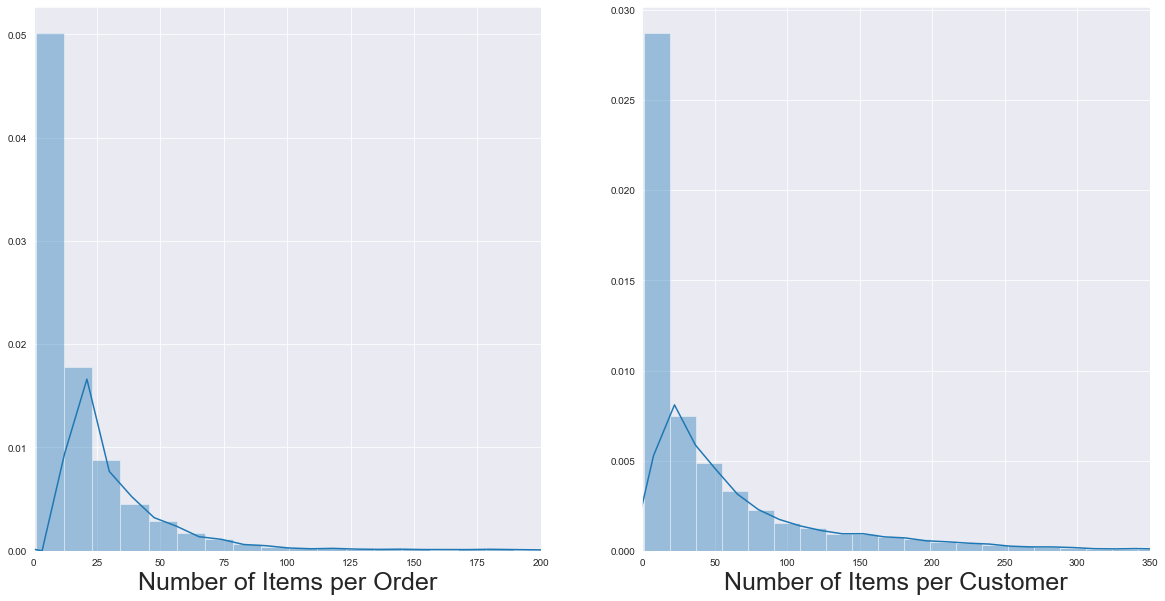

In [31]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1,2)
fig.set_size_inches(20, 10)
plt1 = sns.distplot(groupby_invoice['Number of Items per Order'], ax=ax[0], bins=100)
plt1.set_xlim(0,200)
plt1.set_xlabel(xlabel='Number of Items per Order',fontsize=25)
plt2 = sns.distplot(groupby_ID['Number of Items per Customer'], ax=ax[1], bins=100)
plt2.set_xlim(0,350)
plt2.set_xlabel(xlabel='Number of Items per Customer',fontsize=25)
plt.show()

## Jumlah Pelanggan per Negara

In [32]:
dataset['Total_Cost'] = dataset['Quantity'] * dataset['Price']

In [33]:
dataset.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,CustomerID,Country,CustomerID_is_null,NewID,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,178500,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,178500,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,178500,20.34


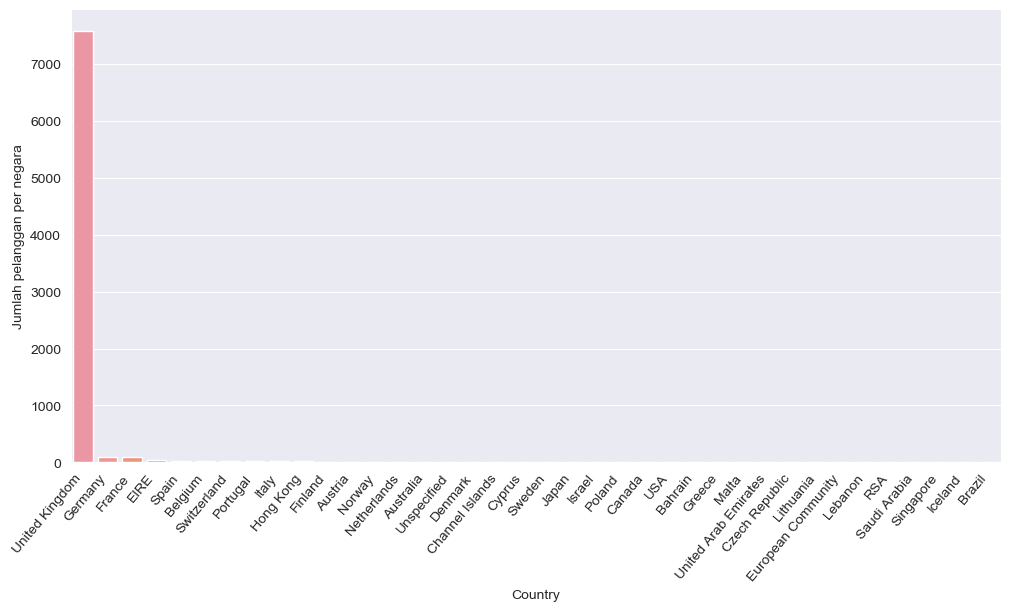

In [34]:
country_df = pd.DataFrame(dataset.groupby('Country')['NewID'].nunique())
country_df.columns = ['Jumlah pelanggan per negara']
country_df.sort_values('Jumlah pelanggan per negara', inplace=True, ascending=False)
fig, ax = plt.subplots(figsize=(12,6),dpi=100)
ax=sns.barplot(x=country_df.index, y=country_df['Jumlah pelanggan per negara'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show()

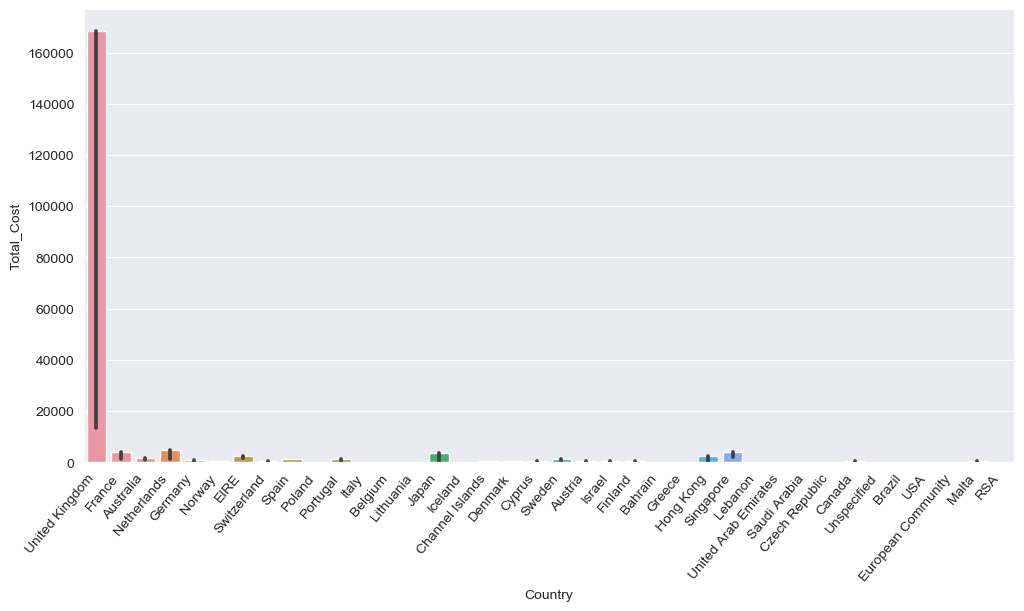

In [35]:
fig1, ax1 = plt.subplots(figsize=(12,6),dpi=100)
ax1=sns.barplot(x='Country', y='Total_Cost', data=dataset, estimator=max, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.show()

## Explorasi United Kingdom

In [36]:
df_uk = dataset[dataset['Country']=='United Kingdom']
df_uk.describe()

,Quantity,Price,CustomerID,CustomerID_is_null,NewID,Total_Cost
count,495478.000000,495478.000000,361878.000000,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,15547.871368,0.269639,264016.667176,16.525065
std,227.588756,99.315438,1594.402590,0.443772,179302.718367,394.839116
min,-80995.000000,-11062.060000,12346.000000,0.000000,123460.000000,-168469.600000
25%,1.000000,1.250000,14194.000000,0.000000,146390.000000,3.290000
50%,3.000000,2.100000,15514.000000,0.000000,166390.000000,8.290000
75%,10.000000,4.130000,16931.000000,1.000000,538566.000000,16.630000
max,80995.000000,38970.000000,18287.000000,1.000000,581498.000000,168469.600000


In [37]:
print("Percentage of customers from the UK: ", round(df_uk['NewID'].nunique() * 100 / dataset['NewID'].nunique(),2),"%" )
print("Number of transactions: ", df_uk['Invoice'].nunique())
print("Number of products Bought: ", df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['NewID'].nunique())

Percentage of customers from the UK:  93.88 %
Number of transactions:  23494
Number of products Bought:  4065
Number of customers: 7587


In [38]:
uk_product = df_uk.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
uk_product.head(10)

,StockCode,Description,Quantity
3154,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48326
4340,85099B,JUMBO BAG RED RETROSPOT,43167
1237,22197,POPCORN HOLDER,34365
3274,84879,ASSORTED COLOUR BIRD ORNAMENT,33679
4353,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32901
1677,22616,PACK OF 12 LONDON TISSUES,25307
437,21212,PACK OF 72 RETROSPOT CAKE CASES,24702
1216,22178,VICTORIAN GLASS HANGING T-LIGHT,23242
41,17003,BROCADE RING PURSE,22801
11,15036,ASSORTED COLOURS SILK FAN,20322


## RFM Analysis

## Data Preparation

Untuk memperoleh segmentasi dari atribut Customers, yang didasarkan pada 3 faktor berikut:
R (Recency) : Jumlah hari sejak pembelian terakhir
F (Frequency) : Jumlah ‘proses transaksi’
M (Monetary) : Jumlah total transaksi (kontribusi pendapatan)

In [39]:
df_uk.shape

(495478, 11)

In [40]:
df_uk = df_uk[df_uk['Quantity']>0]
df_uk.shape

(486286, 11)

In [41]:
#remove rows where customerID are NA
df_uk.dropna(subset=['CustomerID'],how='all',inplace=True)
df_uk.shape

(354345, 11)

In [42]:
print("Number of transactions: ", df_uk['Invoice'].nunique())
print("Number of products bought: ",df_uk['StockCode'].nunique())
print("Number of customers:", df_uk['CustomerID'].nunique() )
print("Percentage of customers NA: ", round(df_uk['CustomerID'].isnull().sum() * 100 / len(dataset),2),"%" )

Number of transactions:  16649
Number of products bought:  3645
Number of customers: 3921
Percentage of customers NA:  0.0 %


## Recency

In [43]:

df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [44]:
now = dt.date(2011,12,9)

In [45]:
df_uk['Date'] = df_uk['InvoiceDate'].dt.date

In [ ]:
df_recency = df_uk.groupby(by='CustomerID', as_index=False)['Date'].max()
df_recency.columns = ['CustomerID', 'Last_Purchase_Date']
df_recency.head()

In [ ]:

df_recency['Recency'] = df_recency['Last_Purchase_Date'].apply(lambda x: (now - x).days)
df_recency.head()

In [ ]:
df_recency.drop('Last_Purchase_Date', axis=1, inplace=True)

## Frequency

In [ ]:
df_uk_copy = df_uk
df_uk_copy.drop_duplicates(subset=['Invoice', 'CustomerID'], keep="first", inplace=True)

df_frequency = df_uk_copy.groupby(by='CustomerID', as_index=False)['Invoice'].count()
df_frequency.columns = ['CustomerID','Frequency']
df_frequency.head()

## Monetary

In [ ]:
df_monetary = df_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
df_monetary.columns = ['CustomerID', 'Monetary']
df_monetary.head()

## Tabel RFM

In [ ]:
#Merge the recency and frequency dataframes
df_merge = df_recency.merge(df_frequency, on='CustomerID')
df_merge.head()

In [ ]:
#Merge with monetary dataframe
df_rfm = df_merge.merge(df_monetary,on='CustomerID')
df_rfm.set_index('CustomerID',inplace=True)
df_rfm.head()

## Customer Segmentation with RFM Model¶

In [ ]:
quantiles = df_rfm.quantile(q=[0.25,0.5,0.75])
quantiles

In [ ]:
quantiles.to_dict()

In [ ]:
#(x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def Rscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

#A(x= value, p = recency, monetary_value, frequency, d = quartiles dict)
def FMscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [ ]:
rfm_segmentation = df_rfm
rfm_segmentation['R_Quartile'] = rfm_segmentation['Recency'].apply(Rscore, args=('Recency',quantiles))
rfm_segmentation['F_Quartile'] = rfm_segmentation['Frequency'].apply(FMscore, args=('Frequency',quantiles))
rfm_segmentation['M_Quartile'] = rfm_segmentation['Monetary'].apply(FMscore, args=('Monetary',quantiles))

In [ ]:
rfm_segmentation.head()

In [ ]:
rfm_segmentation['RFM_Score'] = rfm_segmentation.R_Quartile.map(str) \
                            + rfm_segmentation.F_Quartile.map(str) \
                            + rfm_segmentation.M_Quartile.map(str)
rfm_segmentation.head()

In [ ]:
#top 10 customers
rfm_segmentation[rfm_segmentation['RFM_Score']=='444'].sort_values('Monetary', ascending=False).head(10)

In [ ]:
print("Best Customers: ",len(rfm_segmentation[rfm_segmentation['RFM_Score']=='444']))
print('Loyal Customers: ',len(rfm_segmentation[rfm_segmentation['F_Quartile']==4]))
print("Big Spenders: ",len(rfm_segmentation[rfm_segmentation['M_Quartile']==4]))
print('Almost Lost: ', len(rfm_segmentation[rfm_segmentation['RFM_Score']=='244']))
print('Lost Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='144']))
print('Lost Cheap Customers: ',len(rfm_segmentation[rfm_segmentation['RFM_Score']=='111']))

In [ ]:
def classifier(CustomerID , RFMScore, F_Quartile, M_Quartile, data):
    if(data[RFMScore][CustomerID]=='444'):
        return 'Best Customers'
    elif(data[F_Quartile][CustomerID]==4):
        return 'Loyal Customers'
    elif(data[M_Quartile][CustomerID]==4):
        return 'Big Spenders'
    elif(data[RFMScore][CustomerID]=='244'):
        return 'Almost Lost'
    elif(data[RFMScore][CustomerID]=='144'):
        return 'Lost Customers'
    elif(data[RFMScore][CustomerID]=='111'):
        return 'Lost Cheap Customers'
    else:
        return 'Others'

In [ ]:
df_rfm.head()

In [ ]:
copy=df_rfm

In [ ]:
copy['CustomerID']=copy.index

In [ ]:
copy['CustomerClass']=copy['CustomerID'].apply(classifier, args=('RFM_Score','F_Quartile', 'M_Quartile', df_rfm))

In [ ]:
copy.head(10)

In [ ]:
copy.drop('CustomerID',axis=1,inplace=True)

In [ ]:
copy.head()

In [ ]:
import copy

In [ ]:
final1=copy.deepcopy(df_rfm)

In [ ]:
final2= copy.deepcopy(final1)

In [ ]:
final2.drop('R_Quartile',axis=1,inplace=True)
final2.drop('F_Quartile',axis=1,inplace=True)
final2.drop('M_Quartile',axis=1,inplace=True)
final2.drop('RFM_Score',axis=1,inplace=True)

In [ ]:
final1.head(3)

In [ ]:
final2.head(3)

## Implementasi Clustering K-Means pada Variabel RFM

## Feature Correlations

In [ ]:
final2['CustomerClass'].head()

In [ ]:
final2.drop('CustomerClass',axis=1,inplace=True)

In [ ]:
final2.corr()

In [ ]:
final2['Class']=final1['CustomerClass']
final2.head() 

In [ ]:
sns.heatmap(final2.corr(),cmap="Blues")

## Visualisasi Distribusi Fitur

In [ ]:
scatter_matrix(final2, alpha = 0.3, figsize = (14,7), diagonal = 'kde')

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(final2, hue="Class", height=4).map(plt.scatter, "Recency", "Monetary").add_legend()
plt.show()

## Normalisasi Data

In [ ]:
final2_r_log = np.log(final2['Recency']+0.1) #log(0) is undefined
final2_f_log = np.log(final2['Frequency'])
final2_m_log = np.log(final2['Monetary']+0.1)
final2_c_log = final2['Class']

In [ ]:
log_data = pd.DataFrame({'Monetary': final2_m_log, 'Recency': final2_r_log, 'Frequency': final2_f_log})

In [ ]:
log_data['Class']=final2['Class']

In [ ]:
log_data.head()

In [ ]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
log_data['Class']= label_encoder.fit_transform(log_data['Class']) 
  
log_data['Class'].unique() 

In [ ]:
scatter_matrix(log_data, alpha = 0.2, figsize = (14,7), diagonal = 'kde')

In [ ]:
sns.heatmap(log_data.corr(),cmap="Blues")

In [ ]:
log_data.corr()

In [ ]:
matrix = log_data.as_matrix()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

In [ ]:
n_clusters = 2
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

## Visualisasi Cluster

In [ ]:

plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='plasma')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('Frequency', fontsize=15)
plt.ylabel('Monetary', fontsize=15)

In [ ]:
pd.DataFrame(pd.Series(clusters_customers).value_counts(), columns = ['Number Customers']).T